- Country : Country
- Year : Year
- Status : Country Developed or Developing status
- Life expectancy : Life expectancy in age
- Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths : Number of Infant Deaths per 1000 population
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) -percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles : Measles - number of reported cases per 1000 population
- BMI : Average Body Mass Index of entire population
- under-five deaths : Number of under-five deaths per 1000 population
- Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP : Gross Domestic Product per capita (in USD)
- Population : Population of the country
- thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling : Number of years of Schooling(years)

Import Modules, Load Data and Data Review

In [66]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

EDA

In [67]:
df0 = pd.read_csv("Life Expectancy Data.csv")
df = df0.copy()

In [68]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [70]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [71]:
df[df.duplicated()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.000,2007.519,4.614,2000.000,2004.000,2008.000,2012.000,2015.000
Life expectancy,2928.000,69.225,9.524,36.300,63.100,72.100,75.700,89.000
Adult Mortality,2928.000,164.796,124.292,1.000,74.000,144.000,228.000,723.000
infant deaths,2938.000,30.304,117.927,0.000,0.000,3.000,22.000,1800.000
Alcohol,2744.000,4.603,4.052,0.010,0.877,3.755,7.703,17.870
percentage expenditure,2938.000,738.251,1987.915,0.000,4.685,64.913,441.534,19479.912
Hepatitis B,2385.000,80.940,25.070,1.000,77.000,92.000,97.000,99.000
Measles,2938.000,2419.592,11467.272,0.000,0.000,17.000,360.250,212183.000
BMI,2904.000,38.321,20.044,1.000,19.300,43.500,56.200,87.300
under-five deaths,2938.000,42.036,160.446,0.000,0.000,4.000,28.000,2500.000


In [73]:
df.describe(include=object).T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


In [74]:
df.Country.nunique()

193

In [75]:
df.Status.value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

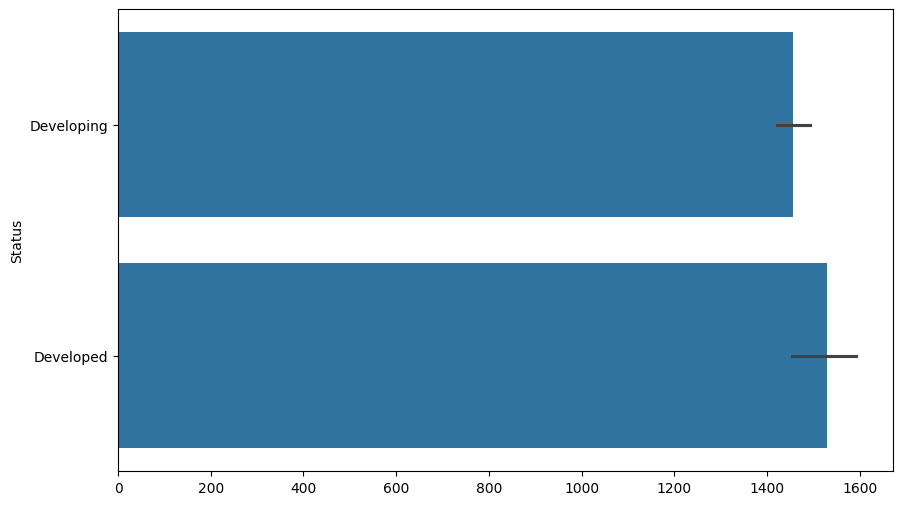

In [76]:
sns.barplot(df.Status);

In [78]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [80]:

df = df[df['Life expectancy ']>0]

In [84]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [91]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [98]:
df.select_dtypes(exclude='object')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,2014,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,2013,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,2012,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,2011,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.300,723.000,27,4.360,0.000,68.000,31,27.100,42,67.000,7.130,65.000,33.600,454.367,12777511.000,9.400,9.400,0.407,9.200
2934,2003,44.500,715.000,26,4.060,0.000,7.000,998,26.700,41,7.000,6.520,68.000,36.700,453.351,12633897.000,9.800,9.900,0.418,9.500
2935,2002,44.800,73.000,25,4.430,0.000,73.000,304,26.300,40,73.000,6.530,71.000,39.800,57.348,125525.000,1.200,1.300,0.427,10.000
2936,2001,45.300,686.000,25,1.720,0.000,76.000,529,25.900,39,76.000,6.160,75.000,42.100,548.587,12366165.000,1.600,1.700,0.427,9.800


In [93]:
X = df.drop("Life expectancy ", axis = 1)
y = df['Life expectancy ']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
X_train.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            136
percentage expenditure               0
Hepatitis B                        378
Measles                              0
 BMI                                25
under-five deaths                    0
Polio                               11
Total expenditure                  154
Diphtheria                          11
 HIV/AIDS                            0
GDP                                298
Population                         440
 thinness  1-19 years               25
 thinness 5-9 years                 25
Income composition of resources    108
Schooling                          108
dtype: int64

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 

# Kategorik ve sayısal özelliklerin isimlerini tanımlayın
categorical_features = ['Country',	'Status']  # Örnek kategorik özellikler
numerical_features = ['Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']  # Örnek sayısal özellikler

# Sayısal veriler için ön işleme adımları
numerical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='mean')),  # Eksik veri doldurma
   ('scaler', StandardScaler())]) # Özellik ölçeklendirme

# Kategorik veriler için ön işleme adımları
categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Eksik veri doldurma
     ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # One-hot encoding



# ColumnTransformer ile farklı türdeki özellikler için ön işleme
preprocessor = ColumnTransformer(
   transformers=[
        ('num', numerical_transformer, numerical_features),
       ('cat', categorical_transformer, categorical_features)
    ])

# KNN modeli için pipeline
steps = [
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=10)),  # En iyi 10 özelliği seçme
    ('linear regression', L())
]
#SelectKBest bir özellik seçme yöntemidir ve f_classif bir skorlama fonksiyonudur. Bu fonksiyon, özelliklerin sınıflandırma #problemlerindeki önemini değerlendirmek için kullanılır. f_classif, ANOVA F-testi istatistiklerini kullanarak her özelliğin #hedef değişkene olan ilişkisini değerlendirir. Bu sayede, en önemli özelliklerin seçilmesine yardımcı olur. Burada k=2, en iyi #10 özelliğin seçileceğini belirtir. Yani, en iyi 10 özelliği seçmek için ANOVA F-testi istatistiğine dayanarak bir değerlendirme #yapılacaktır. Bu sayede, modelin daha iyi performans göstermesi amaçlanır.
pipe_model = Pipeline(steps=steps)

# GridSearchCV için parametre grid'i
param_grid = {
    'feature_selection__k': [1, 2],  # Seçilecek özellik sayısı
    'knn__n_neighbors': range(1, 30),  # KNN için komşu sayısı
    'knn__weights': ['uniform', 'distance'],  # Ağırlıklandırma türü
    'knn__p': [1, 2]  # Minkowski metriği parametresi (1: manhattan, 2: euclidean)
}

pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring='recall')

# Modelin eğitilmesi ve en iyi parametrelerin belirlenmesi için verilerinizin burada olması gerekir
# Örneğin: pipe_grid.fit(X_train, y_train)

In [113]:
pipe_grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Alcohol',
                                                                          'Hepatitis '
                                                                          'B',
                                                                          ' '
                                                                          'BMI ',
                                                                          'Polio',
                                                                          'Total '
                                                                          'expenditure',
                                                                          'Diphtheria ',
                                                                          'GDP',
                                                                          'Population',
                                                                          ' '
                                                                          'thinness  '
                                                                          '1-19 '
                                                                          'years',
                                                                          ' '
                                                                          'thinness '
                                                                          '5-9 '
                                                                          'years',
                                                                          'Income '
                                                                          'composition '
                                                                          'of '
                                                                          'reso...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Country',
                                                                          'Status'])])),
                                       ('feature_selection', SelectKBest()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'feature_selection__k': [1, 2],
                         'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='recall')

In [114]:
pipe_grid.fit(X_train, y_train)

ValueError: 
All the 2320 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_base.py", line 480, in _fit
    check_classification_targets(y)
  File "C:\Users\Yaramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
